In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [2]:
X, y = make_classification(n_samples=10000, n_features=5, n_informative=3, n_redundant=1, n_classes=2, random_state=42)

# Convert to pandas DataFrame for easier viewing
data = pd.DataFrame(X, columns=[f'feature{i+1}' for i in range(X.shape[1])])
data['target'] = y

display(data.head())

,feature1,feature2,feature3,feature4,feature5,target
0,0.210248,0.251033,0.732936,-0.082863,-0.166624,1
1,-1.001370,-0.533479,-0.755450,0.124943,0.531615,0
2,0.639402,-0.862728,-1.396800,-0.142666,-1.365589,0
3,0.855010,-1.115748,1.024813,-0.695600,0.296713,1
4,1.605455,-1.792761,-0.899223,-0.700870,-0.554164,0


In [3]:
data.shape

(10000, 6)

In [4]:
# Function for row sampling

def sample_rows(data,percent):
  return data.sample(int(percent*data.shape[0]),replace = True)

In [5]:
# Function for Feature Sampling

def sample_features(data,percent):
  cols = random.sample(data.columns.tolist()[:-1],int(percent*data.shape[1] - 1))
  new_data =  data[cols]
  new_data['target'] = data['target']
  return new_data

In [6]:
# Function for combined sampling

def combined_sampling(data,row_percent,col_percent):
  new_data = sample_rows(data,row_percent)
  return sample_features(new_data,col_percent)

# For rows

In [7]:
data1 = sample_rows(data,0.5)

In [8]:
data2 = sample_rows(data,0.5)

In [9]:
data3 = sample_rows(data,0.5)

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [11]:
clf1.fit(data1.iloc[:,0:5],data1.iloc[:,-1])
clf2.fit(data2.iloc[:,0:5],data2.iloc[:,-1])
clf3.fit(data3.iloc[:,0:5],data3.iloc[:,-1])

DecisionTreeClassifier()

In [12]:
from sklearn.tree import plot_tree

[Text(0.5073618215402103, 0.9772727272727273, 'x[2] <= -0.076\ngini = 0.5\nsamples = 5000\nvalue = [2504, 2496]'),
 Text(0.3504369138959932, 0.9318181818181818, 'x[0] <= 1.576\ngini = 0.264\nsamples = 2383\nvalue = [2010, 373]'),
 Text(0.4288993677181017, 0.9545454545454546, 'True  '),
 Text(0.18851236146632566, 0.8863636363636364, 'x[2] <= -0.924\ngini = 0.206\nsamples = 2156\nvalue = [1904, 252]'),
 Text(0.0726768968456948, 0.8409090909090909, 'x[2] <= -1.406\ngini = 0.092\nsamples = 1306\nvalue = [1243, 63]'),
 Text(0.04092071611253197, 0.7954545454545454, 'x[4] <= 2.883\ngini = 0.037\nsamples = 853\nvalue = [837.0, 16.0]'),
 Text(0.031827223643080424, 0.75, 'x[3] <= -0.058\ngini = 0.032\nsamples = 850\nvalue = [836.0, 14.0]'),
 Text(0.027280477408354646, 0.7045454545454546, 'x[1] <= -0.683\ngini = 0.06\nsamples = 452\nvalue = [438, 14]'),
 Text(0.022733731173628872, 0.6590909090909091, 'x[1] <= -1.892\ngini = 0.048\nsamples = 449\nvalue = [438, 11]'),
 Text(0.013640238704177323, 0.

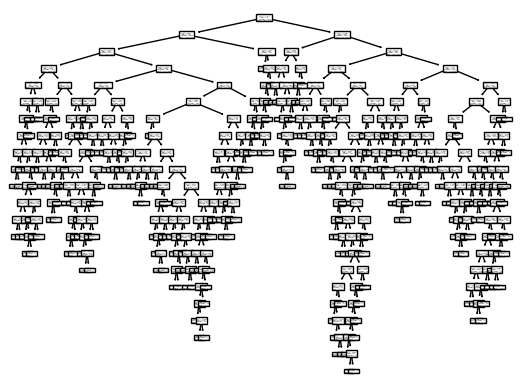

In [13]:
plot_tree(clf1)

[Text(0.3799801784990543, 0.9761904761904762, 'x[2] <= -0.021\ngini = 0.5\nsamples = 5000\nvalue = [2516, 2484]'),
 Text(0.20946724702783032, 0.9285714285714286, 'x[2] <= -0.648\ngini = 0.301\nsamples = 2497\nvalue = [2037, 460]'),
 Text(0.29472371276344234, 0.9523809523809523, 'True  '),
 Text(0.11644867941097001, 0.8809523809523809, 'x[0] <= 2.178\ngini = 0.182\nsamples = 1774\nvalue = [1594, 180]'),
 Text(0.08405245203998919, 0.8333333333333334, 'x[2] <= -1.406\ngini = 0.152\nsamples = 1735\nvalue = [1591, 144]'),
 Text(0.04485274250202648, 0.7857142857142857, 'x[0] <= 1.851\ngini = 0.062\nsamples = 908\nvalue = [879, 29]'),
 Text(0.03620643069440692, 0.7380952380952381, 'x[4] <= 2.905\ngini = 0.047\nsamples = 881\nvalue = [860, 21]'),
 Text(0.03188327479059713, 0.6904761904761905, 'x[4] <= -2.333\ngini = 0.042\nsamples = 879\nvalue = [860, 19]'),
 Text(0.021075385031072685, 0.6428571428571429, 'x[4] <= -2.487\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.016752229127262902,

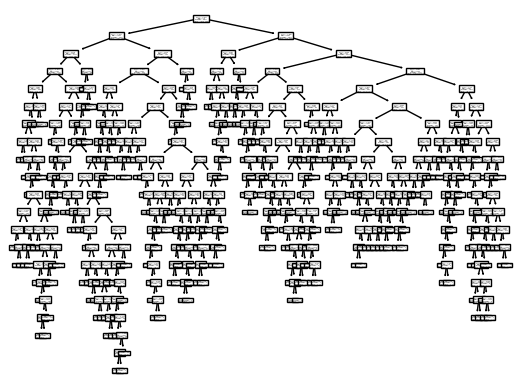

In [14]:
plot_tree(clf2)

[Text(0.5034790640394089, 0.9736842105263158, 'x[2] <= -0.076\ngini = 0.5\nsamples = 5000\nvalue = [2516, 2484]'),
 Text(0.3532866379310345, 0.9210526315789473, 'x[0] <= 1.973\ngini = 0.292\nsamples = 2490\nvalue = [2048, 442]'),
 Text(0.42838285098522166, 0.9473684210526316, 'True  '),
 Text(0.27204433497536945, 0.868421052631579, 'x[2] <= -0.938\ngini = 0.253\nsamples = 2392\nvalue = [2036, 356]'),
 Text(0.12138238916256158, 0.8157894736842105, 'x[1] <= -1.572\ngini = 0.122\nsamples = 1445\nvalue = [1351, 94]'),
 Text(0.053694581280788176, 0.7631578947368421, 'x[4] <= 2.935\ngini = 0.034\nsamples = 645\nvalue = [634, 11]'),
 Text(0.04975369458128079, 0.7105263157894737, 'x[2] <= -1.186\ngini = 0.031\nsamples = 644\nvalue = [634, 10]'),
 Text(0.02857142857142857, 0.6578947368421053, 'x[3] <= -0.265\ngini = 0.02\nsamples = 584\nvalue = [578, 6]'),
 Text(0.024630541871921183, 0.6052631578947368, 'x[3] <= -0.268\ngini = 0.029\nsamples = 410\nvalue = [404, 6]'),
 Text(0.020689655172413793

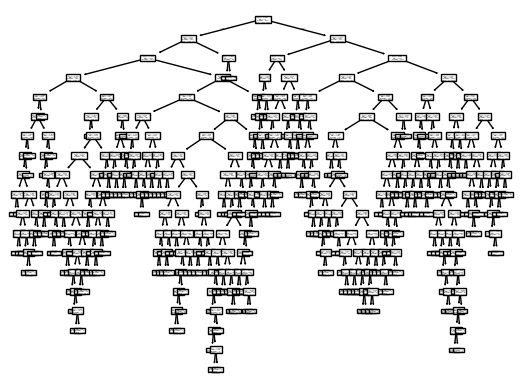

In [15]:
plot_tree(clf3)

In [16]:
clf1.predict(np.array([0.210248,	0.251033,	0.732936,	-0.082863,	-0.166624]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [17]:
clf2.predict(np.array([0.210248,	0.251033,	0.732936,	-0.082863,	-0.166624]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
clf3.predict(np.array([0.210248,	0.251033,	0.732936,	-0.082863,	-0.166624]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# For columns

In [19]:
data4 = sample_features(data,1)

In [20]:
data5 = sample_features(data,1)

In [21]:
data6 = sample_features(data,1)

In [22]:
data4.shape,data5.shape,data6.shape

((10000, 6), (10000, 6), (10000, 6))

In [23]:
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()

In [24]:
clf4.fit(data1.iloc[:,0:5],data1.iloc[:,-1])
clf5.fit(data2.iloc[:,0:5],data2.iloc[:,-1])
clf6.fit(data3.iloc[:,0:5],data3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5004252906152538, 0.9772727272727273, 'x[2] <= -0.076\ngini = 0.5\nsamples = 5000\nvalue = [2504, 2496]'),
 Text(0.34572582931669976, 0.9318181818181818, 'x[0] <= 1.576\ngini = 0.264\nsamples = 2383\nvalue = [2010, 373]'),
 Text(0.4230755599659768, 0.9545454545454546, 'True  '),
 Text(0.187056988942444, 0.8863636363636364, 'x[2] <= -0.924\ngini = 0.206\nsamples = 2156\nvalue = [1904, 252]'),
 Text(0.07251204990076553, 0.8409090909090909, 'x[2] <= -1.406\ngini = 0.092\nsamples = 1306\nvalue = [1243, 63]'),
 Text(0.04082789906436065, 0.7954545454545454, 'x[4] <= 2.883\ngini = 0.037\nsamples = 853\nvalue = [837.0, 16.0]'),
 Text(0.03175503260561384, 0.75, 'x[3] <= -0.058\ngini = 0.032\nsamples = 850\nvalue = [836.0, 14.0]'),
 Text(0.02721859937624043, 0.7045454545454546, 'x[1] <= -0.683\ngini = 0.06\nsamples = 452\nvalue = [438, 14]'),
 Text(0.022682166146867026, 0.6590909090909091, 'x[1] <= -1.892\ngini = 0.048\nsamples = 449\nvalue = [438, 11]'),
 Text(0.013609299688120215, 0.61

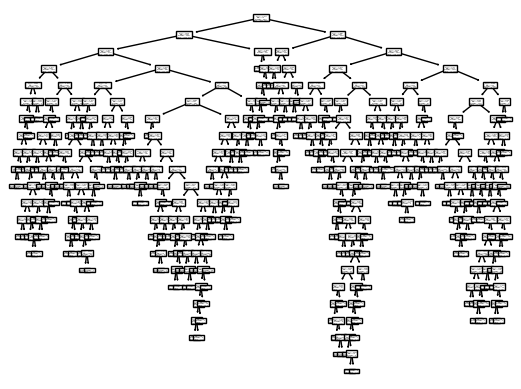

In [25]:
plot_tree(clf4)

[Text(0.37597362185190253, 0.9761904761904762, 'x[2] <= -0.021\ngini = 0.5\nsamples = 5000\nvalue = [2516, 2484]'),
 Text(0.20736060258691486, 0.9285714285714286, 'x[2] <= -0.648\ngini = 0.301\nsamples = 2497\nvalue = [2037, 460]'),
 Text(0.29166711221940866, 0.9523809523809523, 'True  '),
 Text(0.11414633520394196, 0.8809523809523809, 'x[0] <= 2.178\ngini = 0.182\nsamples = 1774\nvalue = [1594, 180]'),
 Text(0.08187192033944703, 0.8333333333333334, 'x[2] <= -1.406\ngini = 0.152\nsamples = 1735\nvalue = [1591, 144]'),
 Text(0.04325212154393649, 0.7857142857142857, 'x[0] <= 1.851\ngini = 0.062\nsamples = 908\nvalue = [879, 29]'),
 Text(0.03449219819326581, 0.7380952380952381, 'x[4] <= 2.905\ngini = 0.047\nsamples = 881\nvalue = [860, 21]'),
 Text(0.030112236517930466, 0.6904761904761905, 'x[4] <= -2.333\ngini = 0.042\nsamples = 879\nvalue = [860, 19]'),
 Text(0.019162332329592115, 0.6428571428571429, 'x[4] <= -2.487\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.01478237065425677

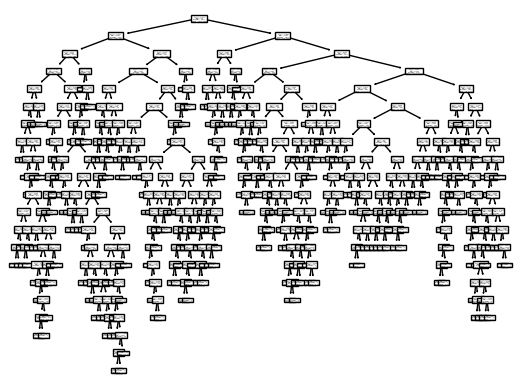

In [26]:
plot_tree(clf5)

[Text(0.5009697197197197, 0.9736842105263158, 'x[2] <= -0.076\ngini = 0.5\nsamples = 5000\nvalue = [2516, 2484]'),
 Text(0.3513122497497497, 0.9210526315789473, 'x[0] <= 1.973\ngini = 0.292\nsamples = 2490\nvalue = [2048, 442]'),
 Text(0.4261409847347347, 0.9473684210526316, 'True  '),
 Text(0.26914414414414417, 0.868421052631579, 'x[2] <= -0.938\ngini = 0.253\nsamples = 2392\nvalue = [2036, 356]'),
 Text(0.11681994494494495, 0.8157894736842105, 'x[1] <= -1.572\ngini = 0.122\nsamples = 1445\nvalue = [1351, 94]'),
 Text(0.04954954954954955, 0.7631578947368421, 'x[4] <= 2.935\ngini = 0.034\nsamples = 645\nvalue = [634, 11]'),
 Text(0.045545545545545546, 0.7105263157894737, 'x[2] <= -1.186\ngini = 0.031\nsamples = 644\nvalue = [634, 10]'),
 Text(0.02702702702702703, 0.6578947368421053, 'x[3] <= -0.265\ngini = 0.02\nsamples = 584\nvalue = [578, 6]'),
 Text(0.023023023023023025, 0.6052631578947368, 'x[3] <= -0.268\ngini = 0.029\nsamples = 410\nvalue = [404, 6]'),
 Text(0.01901901901901902, 

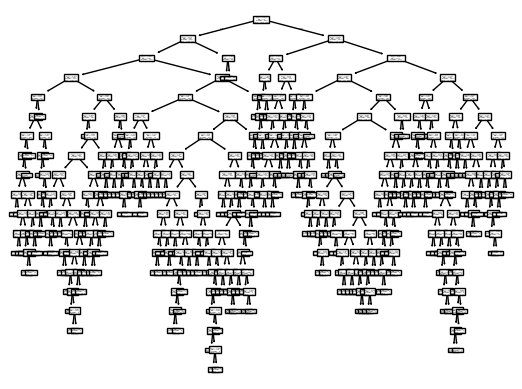

In [27]:
plot_tree(clf6)

In [28]:
print(data4.columns)
print(data5.columns)
print(data6.columns)

Index(['feature2', 'feature5', 'feature3', 'feature4', 'feature1', 'target'], dtype='object')
Index(['feature5', 'feature3', 'feature1', 'feature2', 'feature4', 'target'], dtype='object')
Index(['feature2', 'feature1', 'feature4', 'feature5', 'feature3', 'target'], dtype='object')


In [29]:
data6

,feature2,feature1,feature4,feature5,feature3,target
0,0.251033,0.210248,-0.082863,-0.166624,0.732936,1
1,-0.533479,-1.001370,0.124943,0.531615,-0.755450,0
2,-0.862728,0.639402,-0.142666,-1.365589,-1.396800,0
3,-1.115748,0.855010,-0.695600,0.296713,1.024813,1
4,-1.792761,1.605455,-0.700870,-0.554164,-0.899223,0
...,...,...,...,...,...,...
9995,-4.153867,1.528120,-0.935624,0.072642,-3.891722,0
9996,-1.116843,0.808679,-0.619326,-0.180466,0.639473,1
9997,-0.795717,1.322936,-0.787505,0.624465,1.696377,1
9998,0.009630,0.968025,-0.236506,0.153272,0.439118,1


In [30]:
clf4.predict(np.array([1.528120, 0.072642, -3.891722, -4.153867, -0.935624]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [31]:
clf5.predict(np.array([1.528120, 0.072642, -3.891722, -4.153867, -0.935624]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [32]:
clf6.predict(np.array([1.528120, 0.072642, -3.891722, -4.153867, -0.935624]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Combined Sampling


In [33]:
data7 = combined_sampling(data,0.5,0.5)

/tmp/ipython-input-4123912628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['target'] = data['target']


In [34]:
data8 = combined_sampling(data,0.5,0.5)

/tmp/ipython-input-4123912628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['target'] = data['target']


In [35]:
data9 = combined_sampling(data,0.5,0.5)

/tmp/ipython-input-4123912628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['target'] = data['target']


In [36]:
print(data7.columns)
print(data8.columns)
print(data9.columns)

Index(['feature2', 'feature1', 'target'], dtype='object')
Index(['feature4', 'feature5', 'target'], dtype='object')
Index(['feature2', 'feature5', 'target'], dtype='object')


In [37]:
data9

,feature2,feature5,target
3403,2.843485,2.022457,1
7907,-0.039353,-1.604413,0
5694,1.402285,1.564811,1
4082,-1.093851,-1.454866,1
3847,-1.649744,1.644135,1
...,...,...,...
1603,-4.052365,0.189861,0
6378,0.843787,0.219325,1
5792,0.011482,-0.612949,1
3177,-1.120019,1.297534,0


In [38]:
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()

In [39]:
clf7.fit(data1.iloc[:,0:2],data1.iloc[:,-1])
clf8.fit(data2.iloc[:,0:2],data2.iloc[:,-1])
clf9.fit(data3.iloc[:,0:2],data3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.25277526967544955, 0.9807692307692307, 'x[0] <= -0.397\ngini = 0.5\nsamples = 5000\nvalue = [2504, 2496]'),
 Text(0.06388906477553347, 0.9423076923076923, 'x[1] <= 0.683\ngini = 0.175\nsamples = 993\nvalue = [897, 96]'),
 Text(0.1583321672254915, 0.9615384615384615, 'True  '),
 Text(0.03659849300322928, 0.9038461538461539, 'x[1] <= -2.024\ngini = 0.134\nsamples = 958\nvalue = [889, 69]'),
 Text(0.015196606091306275, 0.8653846153846154, 'x[0] <= -1.207\ngini = 0.32\nsamples = 265\nvalue = [212, 53]'),
 Text(0.008104856582030013, 0.8269230769230769, 'x[1] <= -2.038\ngini = 0.029\nsamples = 204\nvalue = [201, 3]'),
 Text(0.004052428291015007, 0.7884615384615384, 'x[0] <= -1.42\ngini = 0.01\nsamples = 197\nvalue = [196.0, 1.0]'),
 Text(0.0020262141455075033, 0.75, 'gini = 0.0\nsamples = 186\nvalue = [186, 0]'),
 Text(0.00607864243652251, 0.75, 'x[0] <= -1.414\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.004052428291015007, 0.7115384615384616, 'gini = 0.0\nsamples = 1\nva

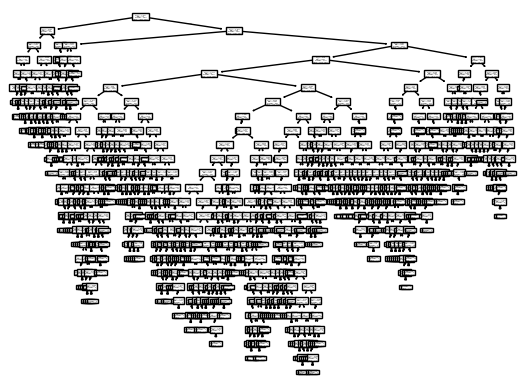

In [40]:
plot_tree(clf7)

[Text(0.2784572083208604, 0.9821428571428571, 'x[0] <= -0.443\ngini = 0.5\nsamples = 5000\nvalue = [2516, 2484]'),
 Text(0.05884365378036264, 0.9464285714285714, 'x[1] <= 0.72\ngini = 0.159\nsamples = 954\nvalue = [871, 83]'),
 Text(0.16865043105061153, 0.9642857142857142, 'True  '),
 Text(0.035579883681149505, 0.9107142857142857, 'x[0] <= -0.879\ngini = 0.119\nsamples = 926\nvalue = [867, 59]'),
 Text(0.014596875356369027, 0.875, 'x[1] <= -2.56\ngini = 0.034\nsamples = 691\nvalue = [679.0, 12.0]'),
 Text(0.0036492188390922567, 0.8392857142857143, 'x[0] <= -1.538\ngini = 0.11\nsamples = 103\nvalue = [97, 6]'),
 Text(0.0018246094195461283, 0.8035714285714286, 'gini = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.005473828258638385, 0.8035714285714286, 'x[1] <= -3.195\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.0036492188390922567, 0.7678571428571429, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.007298437678184513, 0.7678571428571429, 'x[1] <= -2.765\ngini = 0.375\nsampl

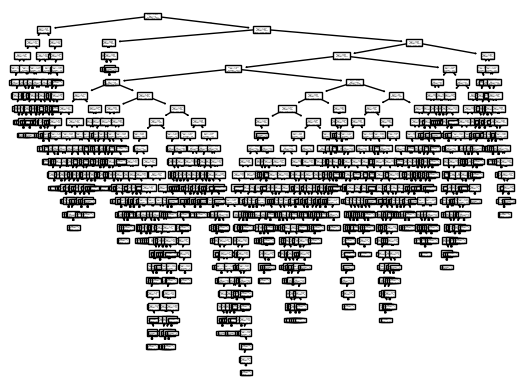

In [41]:
plot_tree(clf8)

[Text(0.2637171077970937, 0.9821428571428571, 'x[0] <= -0.397\ngini = 0.5\nsamples = 5000\nvalue = [2516, 2484]'),
 Text(0.0655852417302799, 0.9464285714285714, 'x[1] <= 0.823\ngini = 0.142\nsamples = 964\nvalue = [890, 74]'),
 Text(0.1646511747636868, 0.9642857142857142, 'True  '),
 Text(0.043638676844783716, 0.9107142857142857, 'x[0] <= -0.679\ngini = 0.107\nsamples = 937\nvalue = [884, 53]'),
 Text(0.027735368956743004, 0.875, 'x[1] <= 0.45\ngini = 0.059\nsamples = 784\nvalue = [760, 24]'),
 Text(0.016793893129770993, 0.8392857142857143, 'x[0] <= -1.257\ngini = 0.052\nsamples = 780\nvalue = [759, 21]'),
 Text(0.010178117048346057, 0.8035714285714286, 'x[1] <= 0.148\ngini = 0.012\nsamples = 507\nvalue = [504, 3]'),
 Text(0.008142493638676845, 0.7678571428571429, 'x[0] <= -2.287\ngini = 0.008\nsamples = 506\nvalue = [504.0, 2.0]'),
 Text(0.0061068702290076335, 0.7321428571428571, 'x[0] <= -2.291\ngini = 0.027\nsamples = 147\nvalue = [145, 2]'),
 Text(0.004071246819338422, 0.6964285714

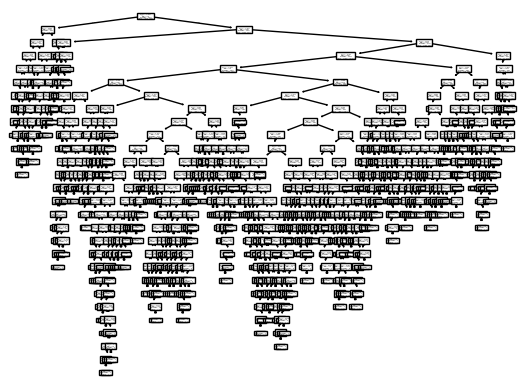

In [42]:
plot_tree(clf9)

In [43]:
clf7.predict(np.array([1.483047,	0.482125]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [44]:
clf8.predict(np.array([1.483047,	0.482125]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [45]:
clf9.predict(np.array([1.483047,	0.482125]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])